In [4]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [5]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    #return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
    return full_country_stats

In [6]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [7]:
# Download the data
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
 
# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
 
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print(country_stats)


                 Air pollution  Assault rate  Consultation on rule-making  \
Country                                                                     
Brazil                    18.0           7.9                          4.0   
Mexico                    30.0          12.8                          9.0   
Russia                    15.0           3.8                          2.5   
Turkey                    35.0           5.0                          5.5   
Hungary                   15.0           3.6                          7.9   
Poland                    33.0           1.4                         10.8   
Chile                     46.0           6.9                          2.0   
Slovak Republic           13.0           3.0                          6.6   
Czech Republic            16.0           2.8                          6.8   
Estonia                    9.0           5.5                          3.3   
Greece                    27.0           3.7                          6.5   

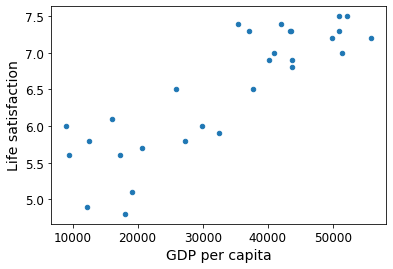

In [8]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

##According to IMF, in 2015, Ghana's GDP per capita was 1,784 USD (in 2020 it is 2,226 USD).

In [9]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()
 
# Train the model
model.fit(X, y)
 
# Make a prediction for Ghana
X_new = [[1784]]  # Ghana' GDP per capita 2015
print(model.predict(X_new))

X_new =[[2226]]
print(model.predict(X_new)) # Ghana' GDP per capita 2020

[[4.94067476]]
[[4.96238378]]


K-Nearest Regression

In [10]:
import sklearn.neighbors
knn_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model
knn_model.fit(X, y)
 
# Make a prediction for Ghana
X_new_knn = [[1784]]  # Ghana' GDP per capita 2015
print(knn_model.predict(X_new_knn))

X_new_knn = [[2226]]  # Ghana' GDP per capita 2020
print(knn_model.predict(X_new_knn))

[[5.5]]
[[5.5]]
